In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
from IPython.display import SVG
import argparse, sys,os,datetime
import tensorflow.keras

In [0]:
from matplotlib import image
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
import scipy.misc
%matplotlib inline

In [4]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.framework import ops
from tensorflow.keras.preprocessing import image


Using TensorFlow backend.


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,BatchNormalization
from tensorflow.keras.layers import Activation,Flatten,GlobalAveragePooling2D
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.callbacks import ModelCheckpoint,TensorBoard,ReduceLROnPlateau
from tensorflow.keras.applications import MobileNetV2 
import datetime
from tensorflow.losses import softmax_cross_entropy

In [0]:

##Setting paths to all directories...

TRAIN_DIR="/content/gdrive/My Drive/Colab Notebooks/Train Directory"
VAL_DIR="/content/gdrive/My Drive/Colab Notebooks/Val Directory"
TEST_DIR="/content/gdrive/My Drive/Colab Notebooks/Test Directory"

In [7]:

##generating a map of all the labels through the directory names...

labels={}
x=0
print(os.listdir(TRAIN_DIR))

for p in os.listdir(TRAIN_DIR):
    labels[x]=p
    x+=1
print(labels)


['polka dots', 'Patterned', 'floral', 'graphic', 'Checked', 'Colourblock', 'solid', 'Melange', 'Printed', 'abstract', 'striped', 'typography']
{0: 'polka dots', 1: 'Patterned', 2: 'floral', 3: 'graphic', 4: 'Checked', 5: 'Colourblock', 6: 'solid', 7: 'Melange', 8: 'Printed', 9: 'abstract', 10: 'striped', 11: 'typography'}


In [0]:
## defining a "feeder" to take batches of images of size "batch" to augment and feed the DL model...
def feeder(batch,targetSize):
    
    #take the image,flip it, scale brightness between 0.8 to 1.2 and finally rescale all images with range...
    #find the rescale value as per the ndarray dtype generated...
    
    #perform basic augmentation to increase the DL model's inputs...
    
    trainAugmenter = ImageDataGenerator(horizontal_flip=True,brightness_range=[0.8, 1.2],height_shift_range=0.1,width_shift_range=0.1,zoom_range=0.2,rescale=1./255)
    testAugmenter = ImageDataGenerator(horizontal_flip=True,brightness_range=[0.8, 1.2],height_shift_range=0.1,width_shift_range=0.1,zoom_range=0.2,rescale=1./255)
        
    
    #augmentation done...moving to create a flow from the directory for both train and test data...
    
    trainGen = trainAugmenter.flow_from_directory(TRAIN_DIR,shuffle=True,target_size=targetSize,
                                                  batch_size=batch,class_mode='categorical')
    
    testGen = testAugmenter.flow_from_directory(VAL_DIR,shuffle=True,target_size=targetSize,
                                               batch_size=batch,class_mode='categorical')
    
    
    #return a dictionary with both train and test generator objects...
    
    return {"train":trainGen,
            "val":testGen }

In [9]:

##Defining the size of the image...

imageWidth  = 600//1
imageHeight = 800//1
imageChannel = 3
batch=32

##generating a flow with given params...
data = feeder(batch,(imageHeight,imageWidth))
train = data["train"]



#the test files have to be labelled for flow to work...


X_train, Y_train=train.next()

#[TODO] : label the files in their respective directories... 
#uncomment this after the TODO is done...
#[DONE] : split training into training and validation 0.9 to 0.1...


val = data["val"]
X_val, Y_val=val.next()

Found 2927 images belonging to 12 classes.
Found 444 images belonging to 12 classes.


[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.

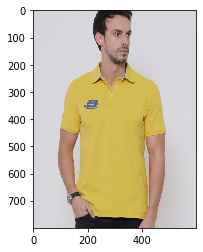

In [0]:
#checking if the labels are correct or not
plt.imshow(X_train[2])
print(Y_train)
print(np.argmax(Y_train[2]))
print(labels[np.argmax(Y_train[2])])

The loading and augmentation part of the data is complete. We now move on to building the model...

In [0]:
inputDims = (imageHeight,imageWidth,3)

def create_model():
    model=Sequential()
    
    model.add(Conv2D(64,kernel_size=(5,5),
                     strides=(2,2),input_shape=inputDims))
    model.add(LeakyReLU(alpha=0.05))
    model.add(Dropout(0.1))
    
    

    model.add(Conv2D(64,kernel_size=(5,5),
                     strides=(2,2),input_shape=inputDims))
    model.add(LeakyReLU(alpha=0.05))
    model.add(Dropout(0.1))
    
    
    model.add(MaxPooling2D())
    
    model.add(Conv2D(64,kernel_size=(5,5),
                     strides=(2,2),input_shape=inputDims))
    model.add(LeakyReLU(alpha=0.05))
    model.add(MaxPooling2D())
    model.add(Dropout(0.1))
    
    #changing 128 to 64...
    model.add(Conv2D(64,kernel_size=(3,3),
                     strides=(2,2),input_shape=inputDims))
    model.add(LeakyReLU(alpha=0.05))
    #model.add(MaxPooling2D(pool_size=(3,3)))
    model.add(Dropout(0.2))
    
    #add 4th layer...
    model.add(Conv2D(64,kernel_size=(3,3),
                     strides=(2,2),input_shape=inputDims))
    model.add(LeakyReLU(alpha=0.05))
    #model.add(MaxPooling2D(pool_size=(3,3)))
    model.add(Dropout(0.2))
    
    
    
    model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001))
    
    
    
    model.add(Flatten())
    
    model.add(Dense(64))
    model.add(Activation("relu"))
    model.add(Dropout(0.3))
    
    model.add(Dense(32))
    model.add(LeakyReLU(alpha=0.05))
    model.add(Dropout(0.2))
    
    model.add(Dense(12))
    model.add(Activation("softmax"))
    
    return model

In [0]:
def train_model(model):
    
    model.compile(loss=categorical_crossentropy, metrics=['accuracy'], optimizer='adam')
    
    lrReducer = ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=3, min_lr=0.001)
    
    chkpt_dir = "/content/gdrive/My Drive/Colab Notebooks/chkpts"
    checkpointer = ModelCheckpoint(monitor='val_acc',filepath=os.path.join(chkpt_dir,"4-3-weights2.hdf5"), 
                                   verbose=1, save_best_only=True)
    
    log_dir="logs\\" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard = TensorBoard(log_dir=log_dir, histogram_freq=1)
    
    model.fit_generator(train,epochs=10,validation_data=val,callbacks=[checkpointer,lrReducer])

In [0]:
def save_trained_model(model):
    model.save("model-4Conv-2Dense-10Epoch-wCallbacks.h5")

    
def load_trained_model(weights_path):
    model = create_model()
    model.load_weights(weights_path)
    return model

In [0]:
modelv1 = create_model()
modelv1.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 398, 298, 64)      4864      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 398, 298, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 199, 149, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 199, 149, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 98, 73, 64)        102464    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 98, 73, 64)        0         
_________________________________________

In [0]:
train_model(modelv1)

Epoch 1/10
14/92 [===>..........................] - ETA: 6:09 - loss: 2.4763 - acc: 0.1014
Epoch 00001: val_acc improved from -inf to 0.10135, saving model to /content/gdrive/My Drive/Colab Notebooks/chkpts/4-3-weights2.hdf5
92/92 [==============================] - 357s 4s/step - loss: 2.6293 - acc: 0.1059 - val_loss: 2.4763 - val_acc: 0.1014
Epoch 2/10
14/92 [===>..........................] - ETA: 6:01 - loss: 2.4790 - acc: 0.1306
Epoch 00002: val_acc improved from 0.10135 to 0.13063, saving model to /content/gdrive/My Drive/Colab Notebooks/chkpts/4-3-weights2.hdf5
92/92 [==============================] - 324s 4s/step - loss: 2.4874 - acc: 0.1155 - val_loss: 2.4790 - val_acc: 0.1306
Epoch 3/10
14/92 [===>..........................] - ETA: 6:08 - loss: 2.5421 - acc: 0.1486
Epoch 00003: val_acc improved from 0.13063 to 0.14865, saving model to /content/gdrive/My Drive/Colab Notebooks/chkpts/4-3-weights2.hdf5
92/92 [==============================] - 326s 4s/step - loss: 2.4424 - acc: 0.1

KeyboardInterrupt: ignored

In [0]:
from tensorflow.keras.optimizers import Adadelta
def create_model2():
    model=Sequential()
    
    #layer1
    model.add(Conv2D(64,kernel_size=(3,3), strides=(2,2),input_shape=inputDims))
    model.add(BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001))
    model.add(LeakyReLU(alpha=0.05))
    model.add(MaxPooling2D())
    
    #layer2
    model.add(Conv2D(64,kernel_size=(3,3), strides=(2,2),input_shape=inputDims))
    model.add(BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001))
    model.add(LeakyReLU(alpha=0.05))
    model.add(MaxPooling2D())
    model.add(Dropout(0.2))
    
    #layer3
    model.add(Conv2D(64,kernel_size=(3,3), strides=(2,2),input_shape=inputDims))
    model.add(BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001))
    model.add(LeakyReLU(alpha=0.05))
    #model.add(MaxPooling2D())
    model.add(Dropout(0.2))
    

    #layer4
    model.add(Conv2D(64,kernel_size=(3,3), strides=(2,2),input_shape=inputDims))
    model.add(BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001))
    model.add(LeakyReLU(alpha=0.05))
    model.add(MaxPooling2D())
    model.add(Dropout(0.2))
    
    #layer5
    model.add(Conv2D(64,kernel_size=(3,3), strides=(2,2),input_shape=inputDims))
    model.add(LeakyReLU(alpha=0.05))
    
    model.add(Flatten())

    #layer6
    #affine layer + batch normalization...
    model.add(Dense(64))
    model.add(BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001))
    model.add(Activation("relu"))

    #layer7
    #affine layer...
    model.add(Dense(12))
    model.add(Activation("softmax"))
    
    return model


def train_model2(model):
    
    model.compile(loss=categorical_crossentropy, metrics=['accuracy'], optimizer='adam')
    
    lrReducer = ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=3, min_lr=0.001)
    
    chkpt_dir = "/content/gdrive/My Drive/Colab Notebooks/chkpts"
    checkpointer = ModelCheckpoint(monitor='val_acc',filepath=os.path.join(chkpt_dir,"5Conv-2Aff-Adadelata-weights.hdf5"), 
                                   verbose=1, save_best_only=True)
    
    log_dir="logs\\" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard = TensorBoard(log_dir=log_dir, histogram_freq=1)
    
    model.fit_generator(train,epochs=20,validation_data=val,callbacks=[checkpointer,lrReducer])



modelv2 = create_model2()
modelv2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 399, 299, 64)      1792      
_________________________________________________________________
batch_normalization_25 (Batc (None, 399, 299, 64)      256       
_________________________________________________________________
leaky_re_lu_25 (LeakyReLU)   (None, 399, 299, 64)      0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 199, 149, 64)      0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 99, 74, 64)        36928     
_________________________________________________________________
batch_normalization_26 (Batc (None, 99, 74, 64)        256       
_________________________________________________________________
leaky_re_lu_26 (LeakyReLU)   (None, 99, 74, 64)       

In [0]:

train_model2(modelv2)

Epoch 1/20
14/92 [===>..........................] - ETA: 8:10 - loss: 2.6500 - acc: 0.0833
Epoch 00001: val_acc improved from -inf to 0.08333, saving model to /content/gdrive/My Drive/Colab Notebooks/chkpts/5Conv-2Aff-Adadelata-weights.hdf5
92/92 [==============================] - 478s 5s/step - loss: 2.4152 - acc: 0.1763 - val_loss: 2.6500 - val_acc: 0.0833
Epoch 2/20
14/92 [===>..........................] - ETA: 8:30 - loss: 2.6801 - acc: 0.1239
Epoch 00002: val_acc improved from 0.08333 to 0.12387, saving model to /content/gdrive/My Drive/Colab Notebooks/chkpts/5Conv-2Aff-Adadelata-weights.hdf5
92/92 [==============================] - 441s 5s/step - loss: 2.1011 - acc: 0.2907 - val_loss: 2.6801 - val_acc: 0.1239
Epoch 3/20
14/92 [===>..........................] - ETA: 8:20 - loss: 2.6736 - acc: 0.1126
Epoch 00003: val_acc did not improve from 0.12387
92/92 [==============================] - 432s 5s/step - loss: 1.9898 - acc: 0.3259 - val_loss: 2.6736 - val_acc: 0.1126
Epoch 4/20
14/

In [0]:
from tensorflow.keras import applications as app
from tensorflow.keras import Model
benchmarkModel = app.xception.Xception(weights='imagenet',include_top=False,input_shape=(800,600,3))
for layers in benchmarkModel.layers[:-5]:
    layers.trainable=False

x = benchmarkModel.output
x = Dropout(0.5)(x)
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='sigmoid')(x)
x = Dropout(0.5)(x)
pred = Dense(12,activation='softmax')(x)
model = Model(inputs=benchmarkModel.input, outputs=pred)

model.summary()

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
lrReducer = ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=3, min_lr=0.001)
    
chkpt_dir = "/content/gdrive/My Drive/Colab Notebooks/chkpts"
checkpointer = ModelCheckpoint(monitor='val_acc',filepath=os.path.join(chkpt_dir,"imagenet-last5-128affine-Adam-weights.hdf5"), 
                                   verbose=1, save_best_only=True)



Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 800, 600, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 399, 299, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 399, 299, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 399, 299, 32) 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

In [0]:
model.fit_generator(train,epochs=20,validation_data=val,callbacks=[checkpointer,lrReducer])

Epoch 1/20
14/92 [===>..........................] - ETA: 22:25 - loss: 2.3174 - acc: 0.2635
Epoch 00001: val_acc improved from -inf to 0.26351, saving model to /content/gdrive/My Drive/Colab Notebooks/chkpts/imagenet-last5-128affine-Adam-weights.hdf5
92/92 [==============================] - 1738s 19s/step - loss: 1.6522 - acc: 0.4469 - val_loss: 2.3174 - val_acc: 0.2635
Epoch 2/20
14/92 [===>..........................] - ETA: 8:58 - loss: 2.2167 - acc: 0.3491
Epoch 00002: val_acc improved from 0.26351 to 0.34910, saving model to /content/gdrive/My Drive/Colab Notebooks/chkpts/imagenet-last5-128affine-Adam-weights.hdf5
92/92 [==============================] - 544s 6s/step - loss: 1.0056 - acc: 0.6607 - val_loss: 2.2167 - val_acc: 0.3491
Epoch 3/20
14/92 [===>..........................] - ETA: 8:50 - loss: 2.0424 - acc: 0.4032
Epoch 00003: val_acc improved from 0.34910 to 0.40315, saving model to /content/gdrive/My Drive/Colab Notebooks/chkpts/imagenet-last5-128affine-Adam-weights.hdf5
9

ok...so the validation accuracy is plumetting meaning the model is overfitting...
so we need to add more examples and drop features....
the first improvement would be to add more features through data augmentation. this step would hopefully create more images for the model to train from
the second improvement would be to to drop features which are not contributing to the classification.
this could be done by cropping out the middle area

In [0]:
!pip install Augmentor


KeyboardInterrupt: ignored

In [12]:
#checking a way to find the number of files in a folder...
AUG_TRAIN="/content/gdrive/My Drive/Colab Notebooks/Augmented Train"
folder="Checked"

path, dirs, files = next(os.walk(os.path.join(TRAIN_DIR,folder)))
file_count = len(files)
print(file_count)

258


In [22]:
!pip install Augmentor
import Augmentor

#define a few important variables...
AUG_TRAIN = "/content/gdrive/My Drive/Colab Notebooks/Augmented Train"
augHeight = 600//2
augWidth = 800//2
augInc = 3

#remove previous aug train dirs...
for root, dirs, files in os.walk(AUG_TRAIN, topdown=False):
    for name in files:
        os.remove(os.path.join(root, name))
    for name in dirs:
        os.rmdir(os.path.join(root, name))



#re-make the target directories...
for folder in os.listdir(TRAIN_DIR):
    os.mkdir(os.path.join(AUG_TRAIN,folder))


#for every folder in training directory,
#mirror it with high probability
#zoom in a little bit at 50% probability
#rotate the image by maximum 10 degress CW or CCW at 20% probability
#finally crop the images to "augSize" as specified to reduce the features/pixel count...
#create augInc times the number of images
#i.e, if we have 300 imgs and augInc is set to 2, our dataset will double.

for folder in os.listdir(AUG_TRAIN):
    p = Augmentor.Pipeline(source_directory=os.path.join(TRAIN_DIR,folder),output_directory=os.path.join(AUG_TRAIN,folder))
    p.flip_left_right(0.3)
    p.zoom(probability=0.3, min_factor=1.0, max_factor=1.4)
    p.rotate(0.2,10,10)
    p.crop_by_size(1,augHeight,augWidth)
    path, dirs, files = next(os.walk(os.path.join(TRAIN_DIR,folder)))
    p.sample(len(files)*augInc)

Executing Pipeline:   0%|          | 0/774 [00:00<?, ? Samples/s]

Initialised with 258 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/Augmented Train/polka dots.

Processing <PIL.Image.Image image mode=RGB size=300x400 at 0x7FCA651E9550>: 100%|██████████| 774/774 [00:21<00:00, 36.00 Samples/s]
Executing Pipeline:   0%|          | 0/765 [00:00<?, ? Samples/s]

Initialised with 255 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/Augmented Train/Patterned.

Processing <PIL.Image.Image image mode=RGB size=300x400 at 0x7FCA5254D048>: 100%|██████████| 765/765 [00:13<00:00, 56.52 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=300x400 at 0x7FCA651E90B8>:   0%|          | 1/789 [00:00<01:56,  6.77 Samples/s]

Initialised with 263 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/Augmented Train/floral.

Processing <PIL.Image.Image image mode=RGB size=300x400 at 0x7FCA525657F0>: 100%|██████████| 789/789 [00:21<00:00, 35.88 Samples/s]
Executing Pipeline:   0%|          | 0/792 [00:00<?, ? Samples/s]

Initialised with 264 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/Augmented Train/graphic.

Processing <PIL.Image.Image image mode=RGB size=300x400 at 0x7FCA651CB320>: 100%|██████████| 792/792 [00:21<00:00, 36.32 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=300x400 at 0x7FCA651E9A20>:   0%|          | 2/774 [00:00<01:14, 10.39 Samples/s]

Initialised with 258 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/Augmented Train/Checked.

Processing <PIL.Image.Image image mode=RGB size=300x400 at 0x7FCA52554F60>: 100%|██████████| 774/774 [00:13<00:00, 57.05 Samples/s]
Executing Pipeline:   0%|          | 0/216 [00:00<?, ? Samples/s]

Initialised with 72 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/Augmented Train/Colourblock.

Processing <PIL.Image.Image image mode=RGB size=300x400 at 0x7FCA65103080>: 100%|██████████| 216/216 [00:14<00:00, 14.42 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=300x400 at 0x7FCA52554828>:   0%|          | 3/780 [00:00<01:42,  7.57 Samples/s]

Initialised with 260 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/Augmented Train/solid.

Processing <PIL.Image.Image image mode=RGB size=300x400 at 0x7FCA524DE6D8>: 100%|██████████| 780/780 [00:20<00:00, 37.50 Samples/s]
Executing Pipeline:   0%|          | 0/774 [00:00<?, ? Samples/s]

Initialised with 258 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/Augmented Train/Melange.

Processing <PIL.Image.Image image mode=RGB size=300x400 at 0x7FCAC2E85D30>: 100%|██████████| 774/774 [00:13<00:00, 55.87 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=300x400 at 0x7FCA6518DDD8>:   1%|          | 7/789 [00:00<02:02,  6.39 Samples/s]

Initialised with 263 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/Augmented Train/Printed.

Processing <PIL.Image.Image image mode=RGB size=300x400 at 0x7FCA56AC9320>: 100%|██████████| 789/789 [00:13<00:00, 57.51 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=300x400 at 0x7FCA64FD3BE0>:   0%|          | 0/768 [00:00<?, ? Samples/s]

Initialised with 256 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/Augmented Train/abstract.

Processing <PIL.Image.Image image mode=RGB size=300x400 at 0x7FCA64FB3470>: 100%|██████████| 768/768 [00:21<00:00, 35.36 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=300x400 at 0x7FCA56AC9C88>:   0%|          | 3/771 [00:00<01:23,  9.16 Samples/s]

Initialised with 257 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/Augmented Train/striped.

Processing <PIL.Image.Image image mode=RGB size=300x400 at 0x7FCA64FD3CF8>: 100%|██████████| 771/771 [00:20<00:00, 37.57 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=300x400 at 0x7FCA56ABB828>:   0%|          | 1/789 [00:00<02:09,  6.06 Samples/s]

Initialised with 263 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/Augmented Train/typography.

Processing <PIL.Image.Image image mode=RGB size=300x400 at 0x7FCA52519F98>: 100%|██████████| 789/789 [00:22<00:00, 35.67 Samples/s]


In [26]:
sum=0
for folder in os.listdir(AUG_TRAIN):
    path, dirs, files = next(os.walk(os.path.join(AUG_TRAIN,folder)))
    file_count = len(files)
    print(file_count)
    sum += file_count
print(sum)

796
765
789
792
774
216
780
774
789
768
771
789
8803


In [30]:
#os.mkdir("/content/gdrive/My Drive/Colab Notebooks/Augmented Validation")
AUG_VAL = "/content/gdrive/My Drive/Colab Notebooks/Augmented Validation"

#remove previous aug val dirs...
for root, dirs, files in os.walk(AUG_VAL, topdown=False):
    for name in files:
        os.remove(os.path.join(root, name))
    for name in dirs:
        os.rmdir(os.path.join(root, name))



#re-make the target directories...
for folder in os.listdir(VAL_DIR):
    os.mkdir(os.path.join(AUG_VAL,folder))


for folder in os.listdir(AUG_VAL):
    p = Augmentor.Pipeline(source_directory=os.path.join(VAL_DIR,folder),output_directory=os.path.join(AUG_VAL,folder))
    p.crop_by_size(1,augHeight,augWidth)
    path, dirs, files = next(os.walk(os.path.join(VAL_DIR,folder)))
    p.sample(len(files))

Processing <PIL.Image.Image image mode=RGB size=300x400 at 0x7FCA64F66940>:  24%|██▍       | 9/37 [00:00<00:00, 39.71 Samples/s]

Initialised with 37 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/Augmented Validation/abstract.

Processing <PIL.Image.Image image mode=RGB size=300x400 at 0x7FCA64F66518>: 100%|██████████| 37/37 [00:00<00:00, 74.33 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=300x400 at 0x7FCA64F48A90>:  30%|██▉       | 11/37 [00:00<00:00, 27.77 Samples/s]

Initialised with 37 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/Augmented Validation/Checked.

Processing <PIL.Image.Image image mode=RGB size=300x400 at 0x7FCA64F5BB00>: 100%|██████████| 37/37 [00:00<00:00, 85.80 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=300x400 at 0x7FCA64F486A0>:  30%|██▉       | 11/37 [00:00<00:00, 29.38 Samples/s]

Initialised with 37 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/Augmented Validation/Colourblock.

Processing <PIL.Image.Image image mode=RGB size=300x400 at 0x7FCA64FD32E8>: 100%|██████████| 37/37 [00:00<00:00, 57.10 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=300x400 at 0x7FCA64F5F278>:  19%|█▉        | 7/37 [00:00<00:03,  8.10 Samples/s]

Initialised with 37 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/Augmented Validation/floral.

Processing <PIL.Image.Image image mode=RGB size=300x400 at 0x7FCA64F5BD30>: 100%|██████████| 37/37 [00:00<00:00, 64.66 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=300x400 at 0x7FCA64F53DA0>:  24%|██▍       | 9/37 [00:00<00:01, 17.12 Samples/s]

Initialised with 37 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/Augmented Validation/graphic.

Processing <PIL.Image.Image image mode=RGB size=300x400 at 0x7FCA64F5FE80>: 100%|██████████| 37/37 [00:00<00:00, 76.56 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=300x400 at 0x7FCA64F5B518>:  30%|██▉       | 11/37 [00:00<00:00, 29.69 Samples/s]

Initialised with 37 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/Augmented Validation/Melange.

Processing <PIL.Image.Image image mode=RGB size=300x400 at 0x7FCA64F66128>: 100%|██████████| 37/37 [00:00<00:00, 82.59 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=300x400 at 0x7FCA64F53198>:  24%|██▍       | 9/37 [00:00<00:03,  7.78 Samples/s]

Initialised with 37 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/Augmented Validation/polka dots.

Processing <PIL.Image.Image image mode=RGB size=300x400 at 0x7FCA64F48160>: 100%|██████████| 37/37 [00:00<00:00, 75.48 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=300x400 at 0x7FCA64F53908>:  30%|██▉       | 11/37 [00:00<00:00, 36.44 Samples/s]

Initialised with 37 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/Augmented Validation/Patterned.

Processing <PIL.Image.Image image mode=RGB size=300x400 at 0x7FCA64F661D0>: 100%|██████████| 37/37 [00:00<00:00, 83.45 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=300x400 at 0x7FCA64F5BC50>:  38%|███▊      | 14/37 [00:00<00:00, 47.58 Samples/s]

Initialised with 37 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/Augmented Validation/Printed.

Processing <PIL.Image.Image image mode=RGB size=300x400 at 0x7FCA64F53400>: 100%|██████████| 37/37 [00:00<00:00, 88.81 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=300x400 at 0x7FCA64F5B9B0>:  24%|██▍       | 9/37 [00:00<00:00, 38.50 Samples/s]

Initialised with 37 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/Augmented Validation/solid.

Processing <PIL.Image.Image image mode=RGB size=300x400 at 0x7FCA64F66898>: 100%|██████████| 37/37 [00:00<00:00, 79.10 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=300x400 at 0x7FCA64F48160>:  19%|█▉        | 7/37 [00:00<00:04,  7.43 Samples/s]

Initialised with 37 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/Augmented Validation/striped.

Processing <PIL.Image.Image image mode=RGB size=300x400 at 0x7FCA64F53940>: 100%|██████████| 37/37 [00:00<00:00, 72.39 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=300x400 at 0x7FCA64F3FEF0>:  22%|██▏       | 8/37 [00:00<00:01, 19.52 Samples/s]

Initialised with 37 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/Augmented Validation/typography.

Processing <PIL.Image.Image image mode=RGB size=300x400 at 0x7FCA64F485C0>: 100%|██████████| 37/37 [00:00<00:00, 69.72 Samples/s]


In [0]:
def feeder(batch,targetSize):
    
    #take the image,flip it, scale brightness between 0.8 to 1.2 and finally rescale all images with range...
    #find the rescale value as per the ndarray dtype generated...
    
    #perform basic augmentation to increase the DL model's inputs...
    
    trainAugmenter = ImageDataGenerator(horizontal_flip=True,brightness_range=[0.8, 1.2],height_shift_range=0.1,width_shift_range=0.1,zoom_range=0.2,rescale=1./255)
    testAugmenter = ImageDataGenerator(horizontal_flip=True,brightness_range=[0.8, 1.2],height_shift_range=0.1,width_shift_range=0.1,zoom_range=0.2,rescale=1./255)
        
    
    #augmentation done...moving to create a flow from the directory for both train and test data...
    
    trainGen = trainAugmenter.flow_from_directory(AUG_TRAIN,shuffle=True,target_size=targetSize,
                                                  batch_size=batch,class_mode='categorical')
    
    testGen = testAugmenter.flow_from_directory(AUG_VAL,shuffle=True,target_size=targetSize,
                                               batch_size=batch,class_mode='categorical')
    
    
    #return a dictionary with both train and test generator objects...
    
    return {"train":trainGen,
            "val":testGen }

In [32]:
imageWidth  = 600//2
imageHeight = 800//2
imageChannel = 3
batch=32

##generating a flow with given params...
data = feeder(batch,(imageHeight,imageWidth))


train = data["train"]
X_train, Y_train=train.next()
val = data["val"]
X_val, Y_val=val.next()


Found 8781 images belonging to 12 classes.
Found 444 images belonging to 12 classes.


In [41]:
from tensorflow.keras import applications as app
from tensorflow.keras import Model
benchmarkModel = app.xception.Xception(weights='imagenet',include_top=False,input_shape=(400,300,3))
for layers in benchmarkModel.layers[:-4]:
    layers.trainable=False

x = benchmarkModel.output
x = Dropout(0.5)(x)
x = GlobalAveragePooling2D()(x)
x = Dense(64,activation='sigmoid')(x)
x = Dropout(0.5)(x)
pred = Dense(12,activation='softmax')(x)
model = Model(inputs=benchmarkModel.input, outputs=pred)

model.summary()

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
lrReducer = ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=3, min_lr=0.001)
    
chkpt_dir = "/content/gdrive/My Drive/Colab Notebooks/chkpts"
checkpointer = ModelCheckpoint(monitor='val_acc',filepath=os.path.join(chkpt_dir,"imagenet-last4-64affine-Adam-wAugmentation-weights.hdf5"), 
                                   verbose=1, save_best_only=True)



Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 400, 300, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 199, 149, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 199, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 199, 149, 32) 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

In [42]:
model.fit_generator(train,epochs=10,validation_data=val,callbacks=[checkpointer,lrReducer])

Epoch 1/10
 14/275 [>.............................] - ETA: 6:32 - loss: 1.8869 - acc: 0.4550
Epoch 00001: val_acc improved from -inf to 0.45495, saving model to /content/gdrive/My Drive/Colab Notebooks/chkpts/imagenet-last4-64affine-Adam-wAugmentation-weights.hdf5
275/275 [==============================] - 337s 1s/step - loss: 1.3946 - acc: 0.5643 - val_loss: 1.8869 - val_acc: 0.4550
Epoch 2/10
 14/275 [>.............................] - ETA: 6:11 - loss: 2.0229 - acc: 0.4257
Epoch 00002: val_acc did not improve from 0.45495
275/275 [==============================] - 288s 1s/step - loss: 0.8735 - acc: 0.7356 - val_loss: 2.0229 - val_acc: 0.4257
Epoch 3/10
 14/275 [>.............................] - ETA: 6:11 - loss: 2.1660 - acc: 0.4054
Epoch 00003: val_acc did not improve from 0.45495
275/275 [==============================] - 292s 1s/step - loss: 0.7015 - acc: 0.7856 - val_loss: 2.1660 - val_acc: 0.4054
Epoch 4/10
 14/275 [>.............................] - ETA: 6:10 - loss: 2.0588 - ac

In [0]:
#since the model curved up at 9 th epoch i decided to run it for a few more epochs...
model.load_weights(os.path.join(chkpt_dir,"imagenet-last8-64affine-Adam-wAugmentation-weights.hdf5"))

In [40]:
model.fit_generator(train,epochs=10,validation_data=val,callbacks=[checkpointer,lrReducer])

Epoch 1/10
 14/275 [>.............................] - ETA: 6:04 - loss: 2.2656 - acc: 0.5090
Epoch 00001: val_acc did not improve from 0.55405
275/275 [==============================] - 290s 1s/step - loss: 0.1604 - acc: 0.9550 - val_loss: 2.2656 - val_acc: 0.5090
Epoch 2/10
 14/275 [>.............................] - ETA: 5:53 - loss: 2.1538 - acc: 0.5518
Epoch 00002: val_acc did not improve from 0.55405
275/275 [==============================] - 280s 1s/step - loss: 0.1395 - acc: 0.9626 - val_loss: 2.1538 - val_acc: 0.5518
Epoch 3/10
 14/275 [>.............................] - ETA: 5:56 - loss: 2.2399 - acc: 0.5383
Epoch 00003: val_acc did not improve from 0.55405
275/275 [==============================] - 282s 1s/step - loss: 0.1270 - acc: 0.9654 - val_loss: 2.2399 - val_acc: 0.5383
Epoch 4/10
 14/275 [>.............................] - ETA: 6:02 - loss: 2.4276 - acc: 0.5248
Epoch 00004: val_acc did not improve from 0.55405
275/275 [==============================] - 281s 1s/step - loss